In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the preprocessed data
df = pd.read_csv('data/preprocessed_combined_dataset.csv')

# Display the first few rows to verify
print(df.head())
print(df.info())


C:\Users\linke\AppData\Local\Temp\ipykernel_4964\2110782189.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/preprocessed_combined_dataset.csv')


    order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  2020-01-10  received   574772   oasis_Oasis-064-36          4.5   
1  100354678  2020-01-10  received   574774      Fantastic_FT-48          4.5   
2  100354680  2020-01-10  complete   574777      mdeal_DMC-610-8          4.5   
3  100354680  2020-01-10  complete   574779   oasis_Oasis-061-36          4.5   
4  100367357         NaN  received   595185  MEFNAR59C38B6CA08CD          2.0   

   price_x   value  discount_amount   total  ... productURL stars reviews  \
0     89.9  1798.0              0.0  1798.0  ...        NaN   NaN     NaN   
1     19.0   190.0              0.0   190.0  ...        NaN   NaN     NaN   
2    149.9  1199.2              0.0  1199.2  ...        NaN   NaN     NaN   
3     79.9   639.2              0.0   639.2  ...        NaN   NaN     NaN   
4     99.9    99.9              0.0    99.9  ...        NaN   NaN     NaN   

   price_y  listPrice category_id  isBestSeller bo

In [5]:
# Define the features (X) and target variable (y)
X = df[['price_x', 'discount_amount', 'value']]  # Modify if necessary to include relevant features
y = df['qty_ordered']  # Target variable for regression


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the splits to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200474, 3)
X_test shape: (85918, 3)
y_train shape: (200474,)
y_test shape: (85918,)


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model training complete.")


Gradient Boosting Regressor model training complete.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-Squared (R²)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor - Mean Squared Error (MSE): {mse_gb}')
print(f'Gradient Boosting Regressor - R-Squared (R²): {r2_gb}')


Gradient Boosting Regressor - Mean Squared Error (MSE): 0.030057765892305643
Gradient Boosting Regressor - R-Squared (R²): 0.9649095419792192


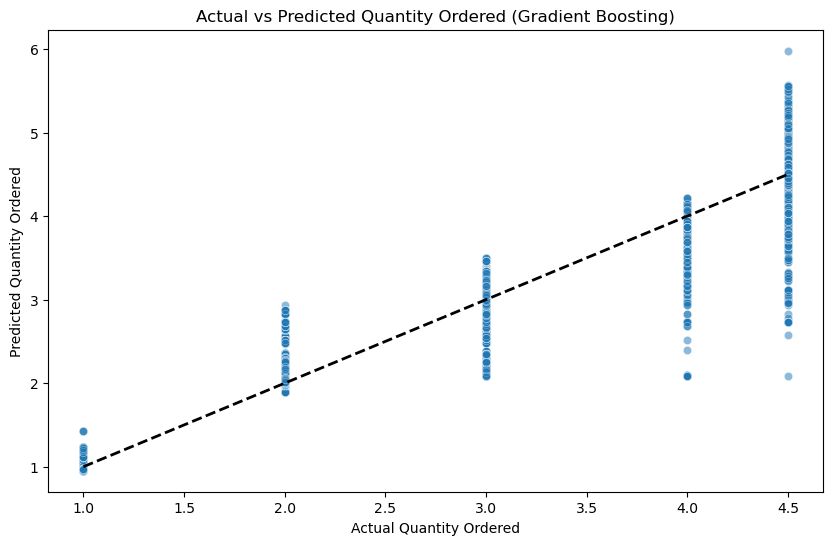

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Quantity Ordered')
plt.ylabel('Predicted Quantity Ordered')
plt.title('Actual vs Predicted Quantity Ordered (Gradient Boosting)')
plt.show()
